In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

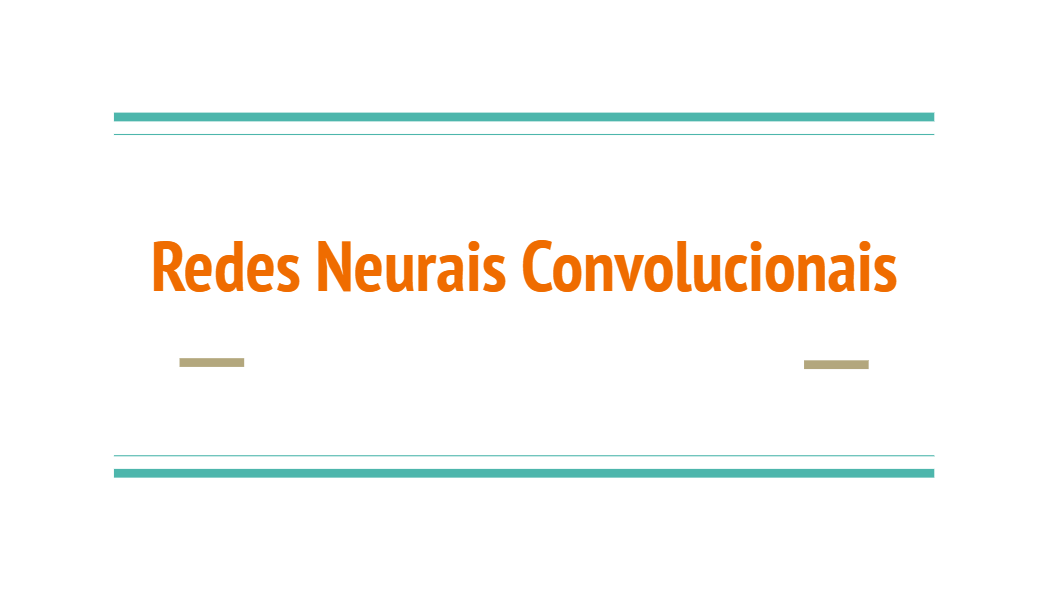

## Bibliotecas

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

## Introdução

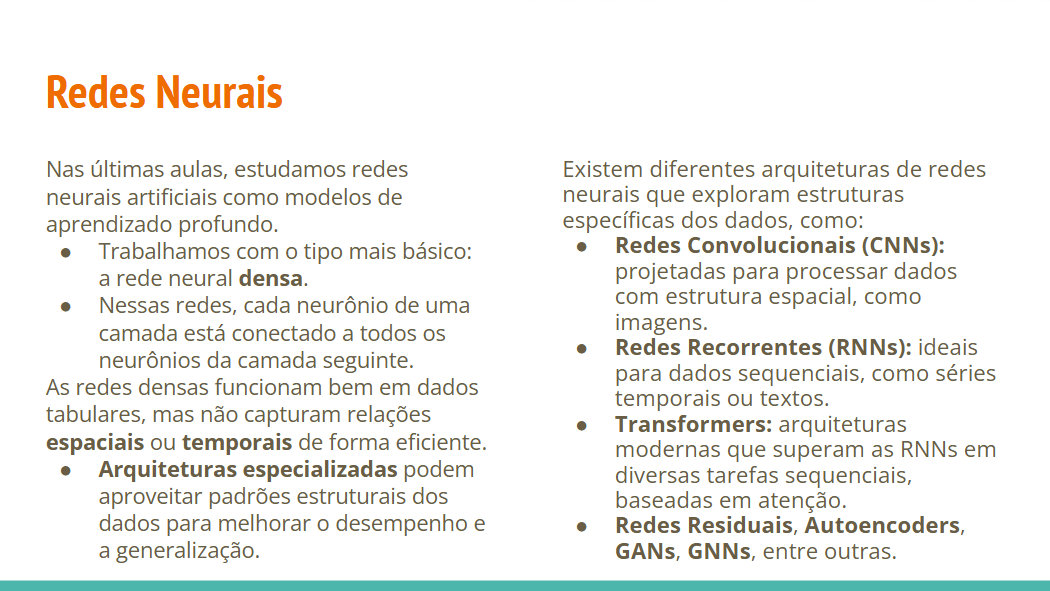

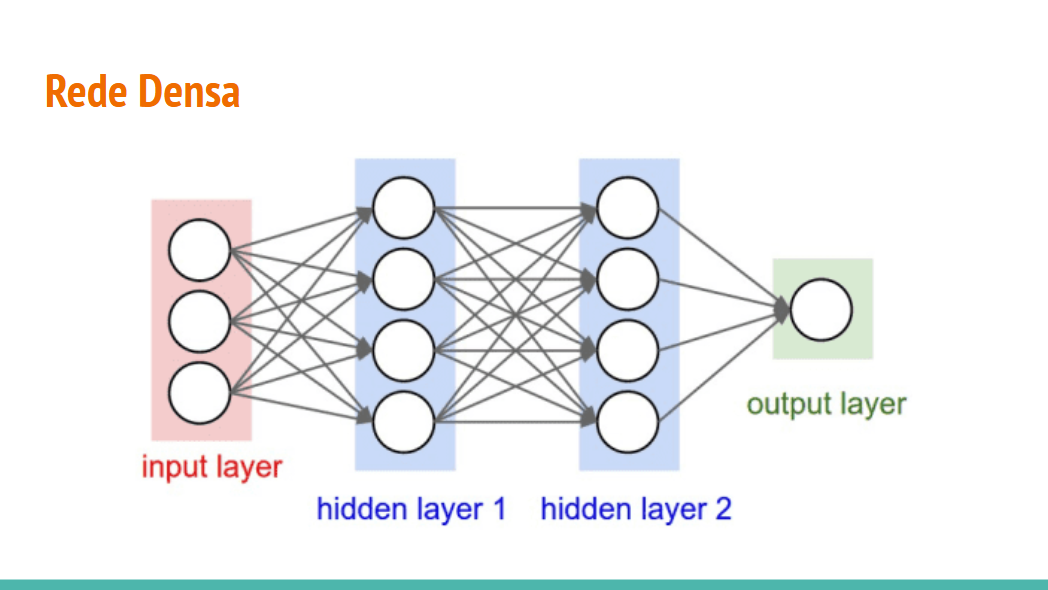

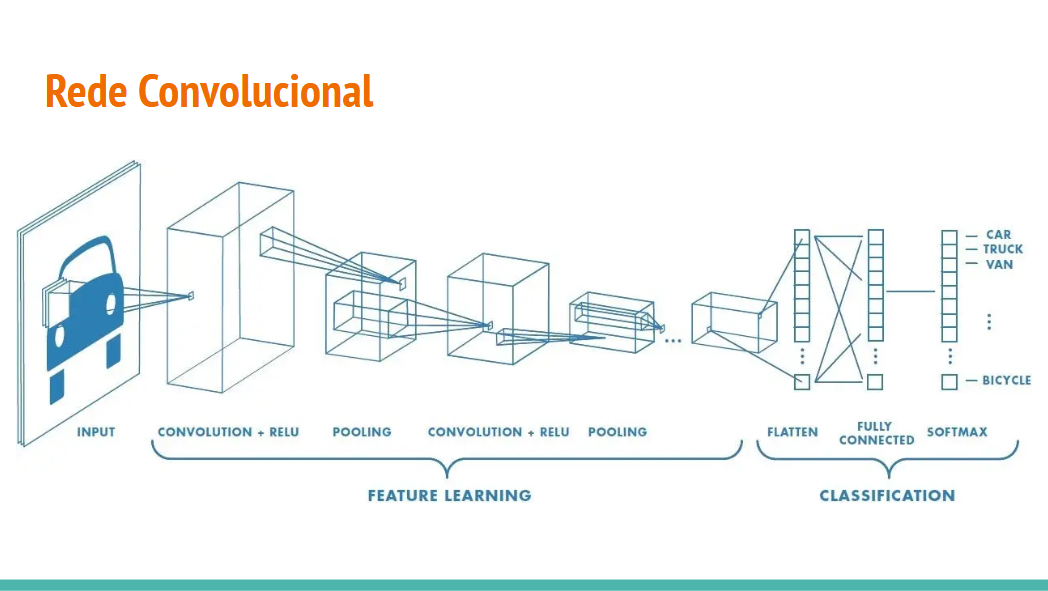

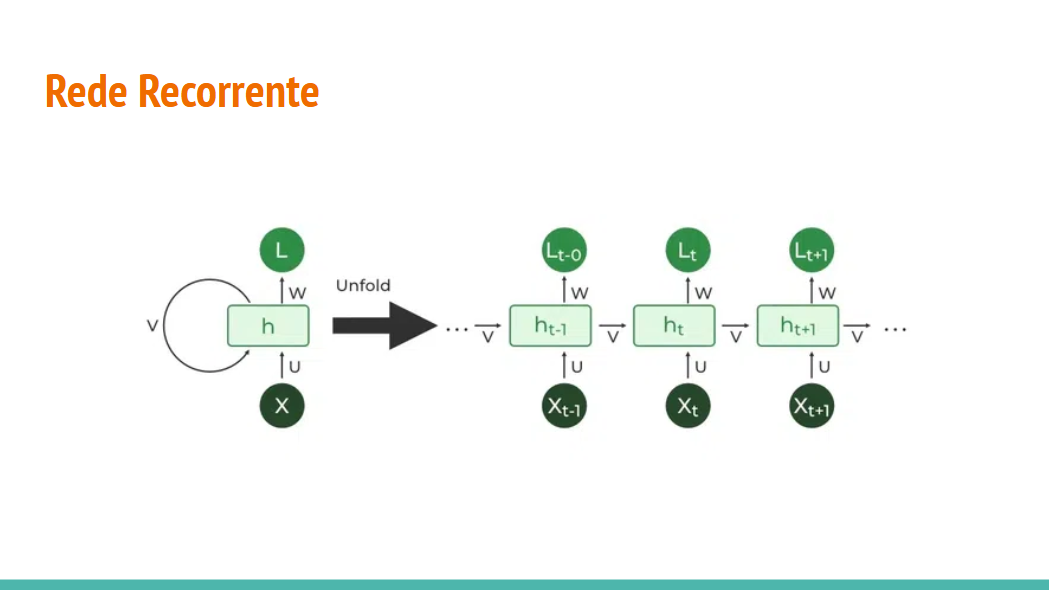

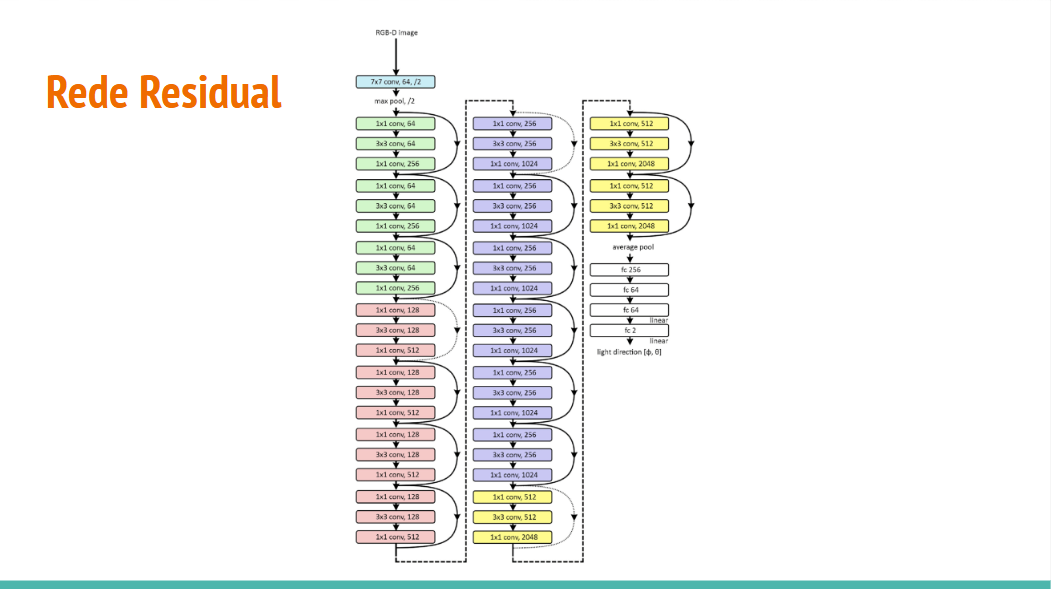

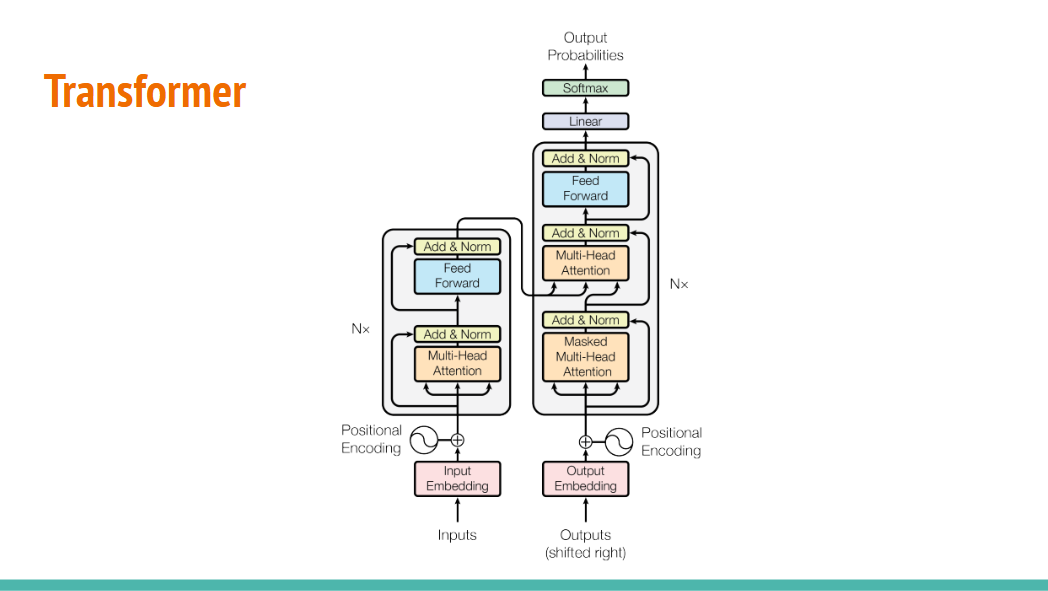

## Redes Convolucionais

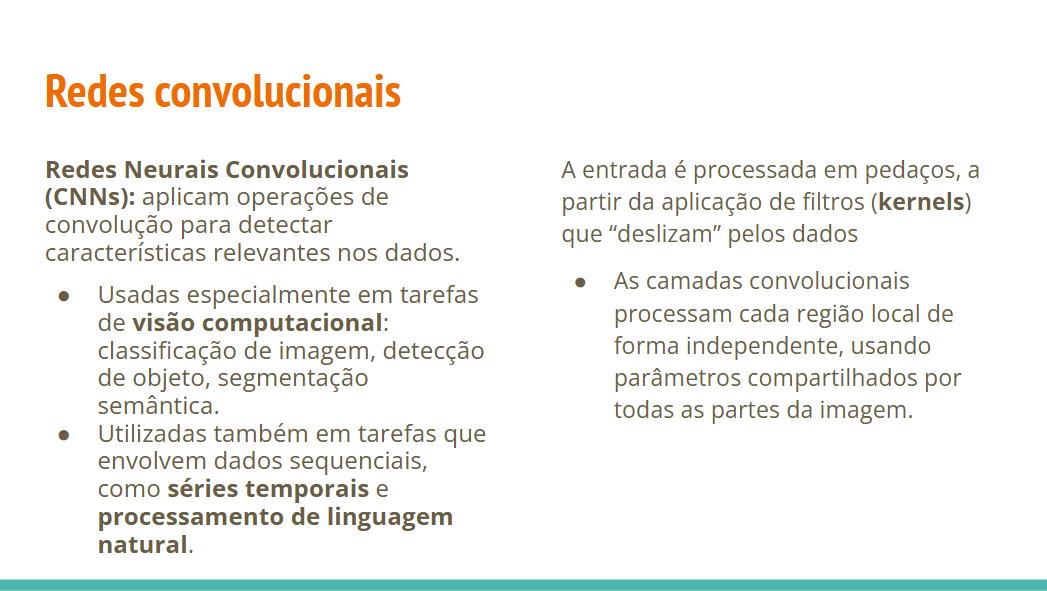

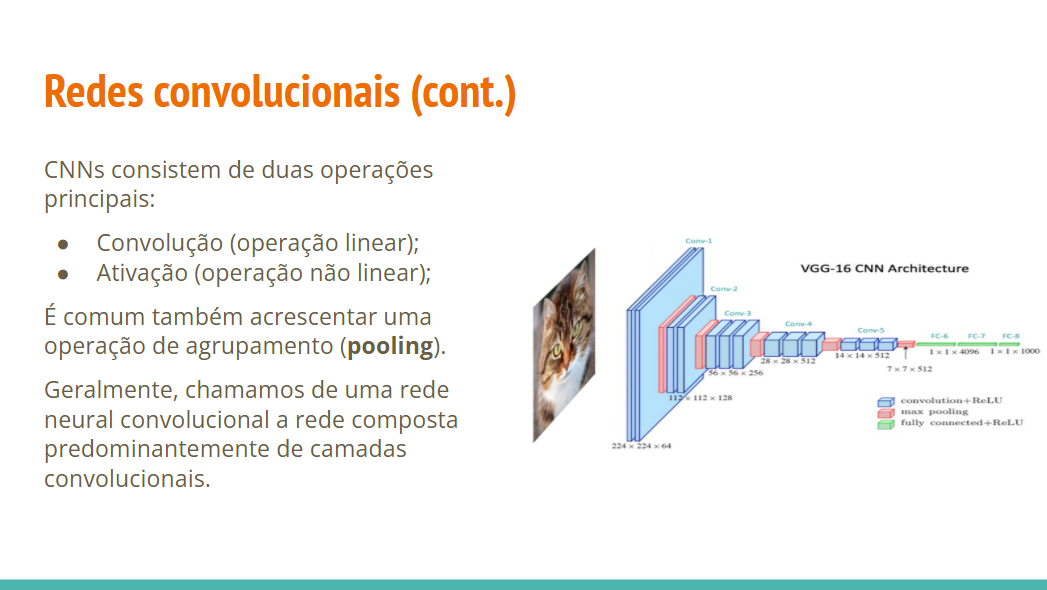

### Convolução

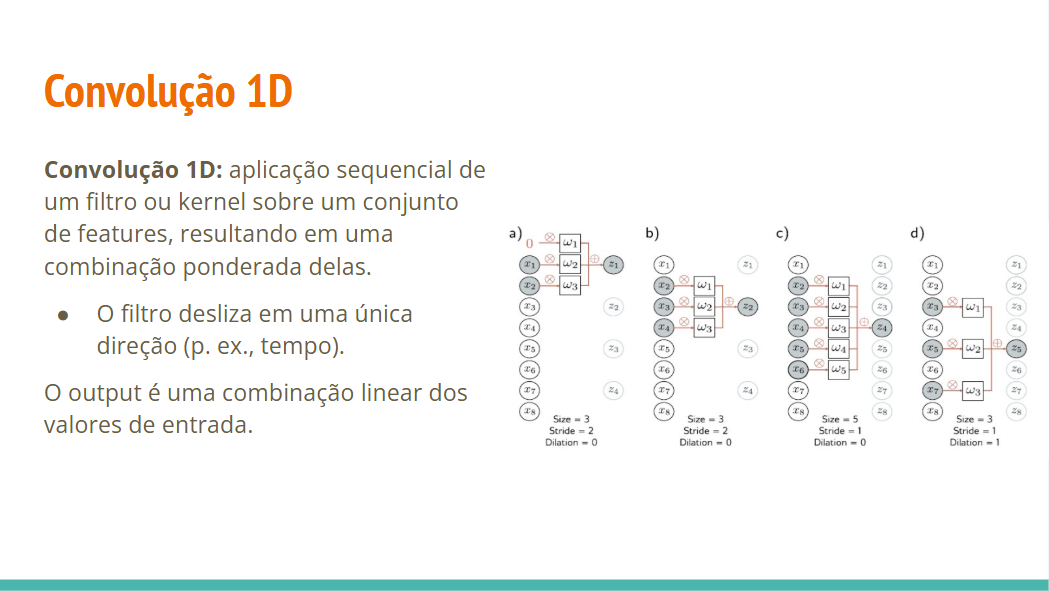

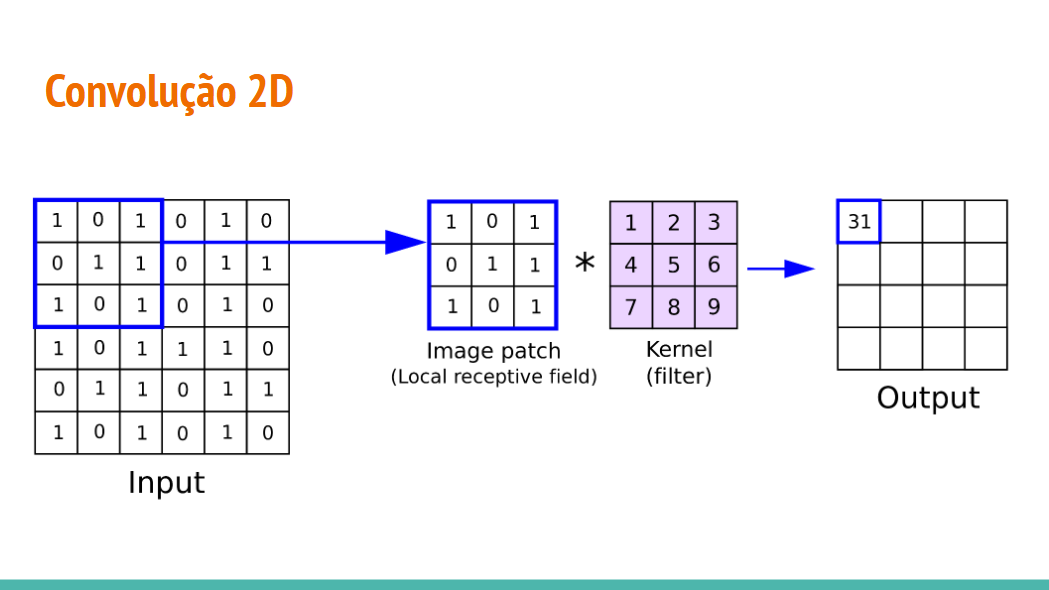

**Exemplo:** http://deeplearning.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

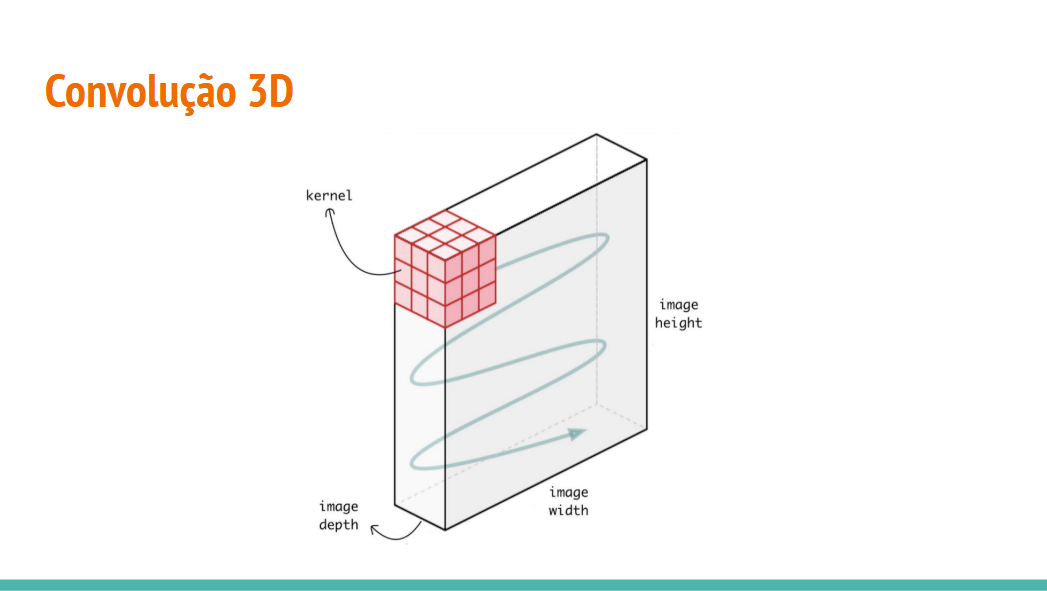

### Ativação

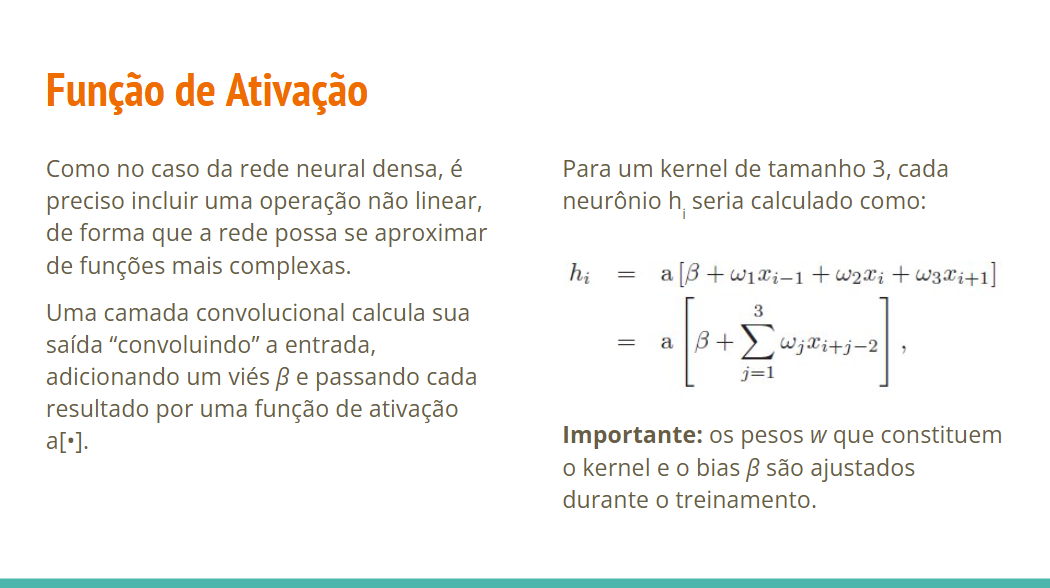

## Pooling

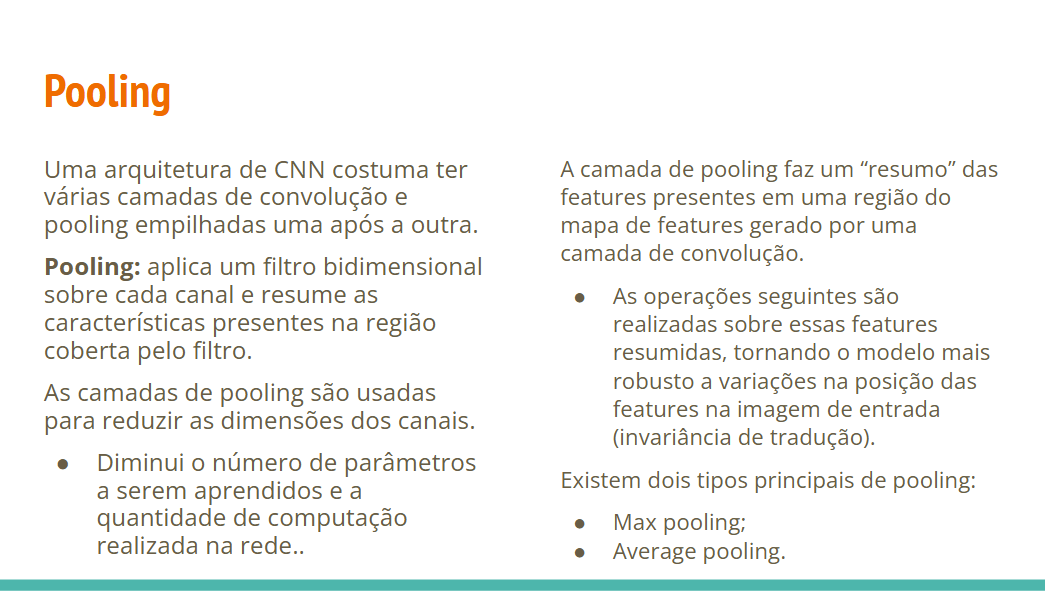

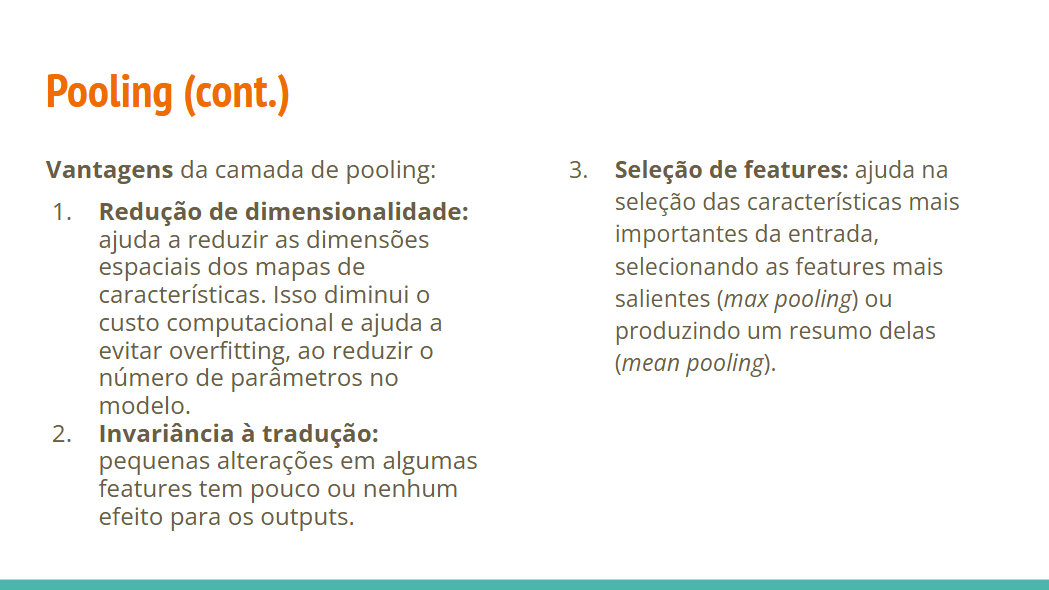

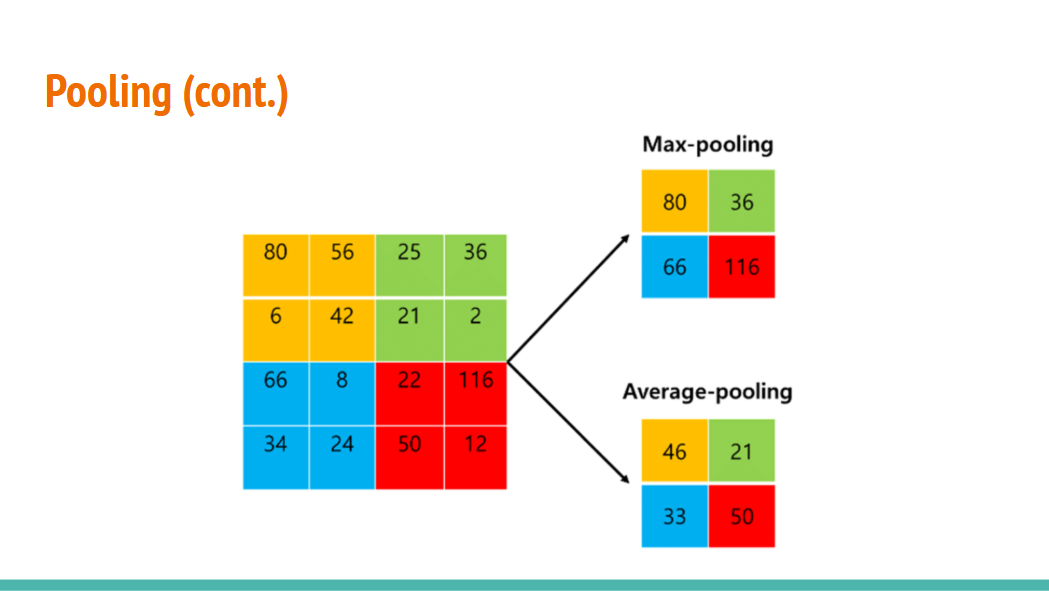

## Translação

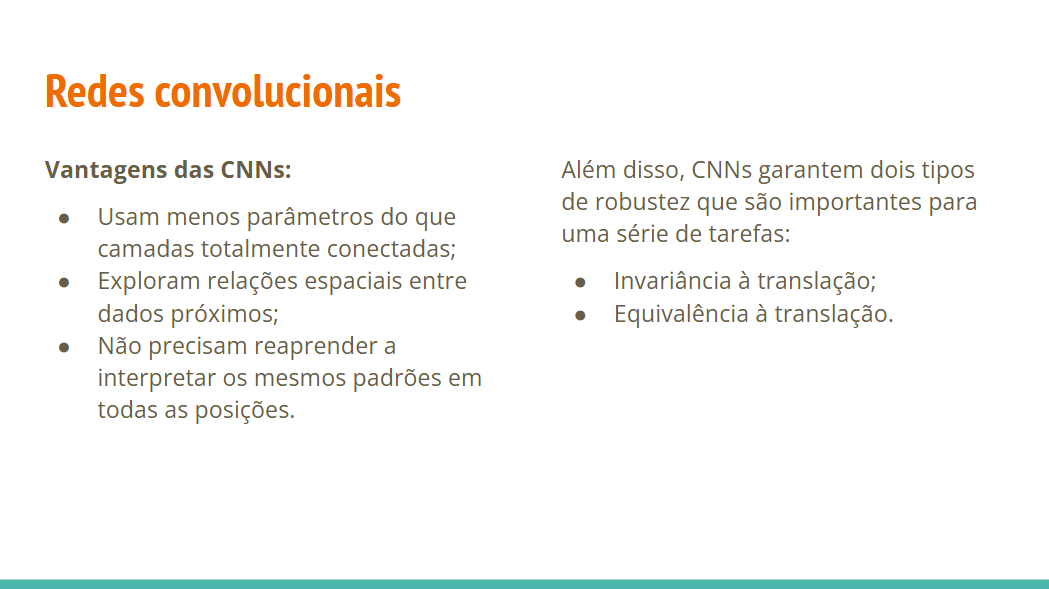

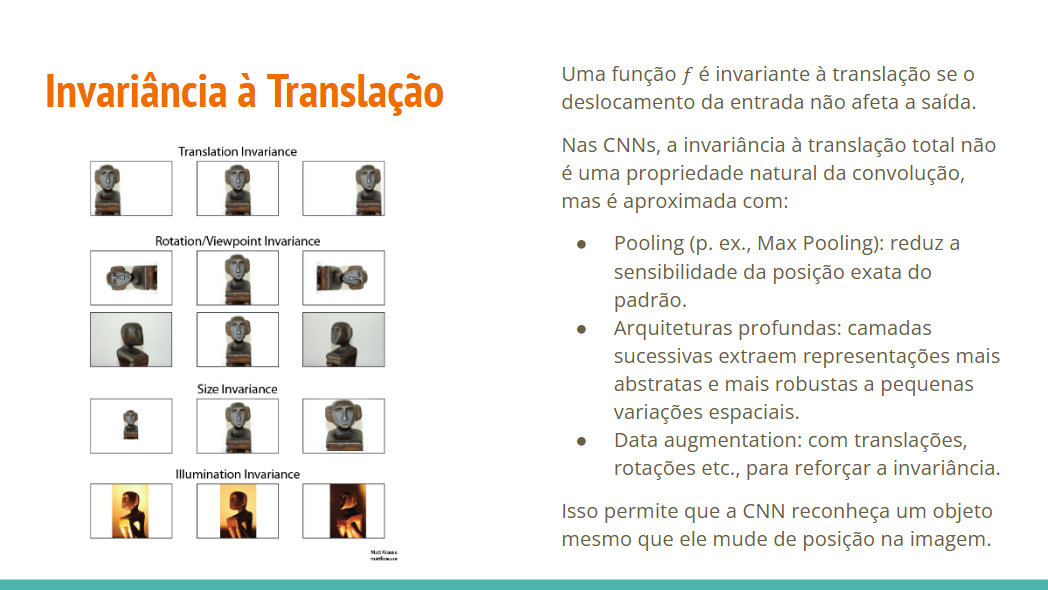

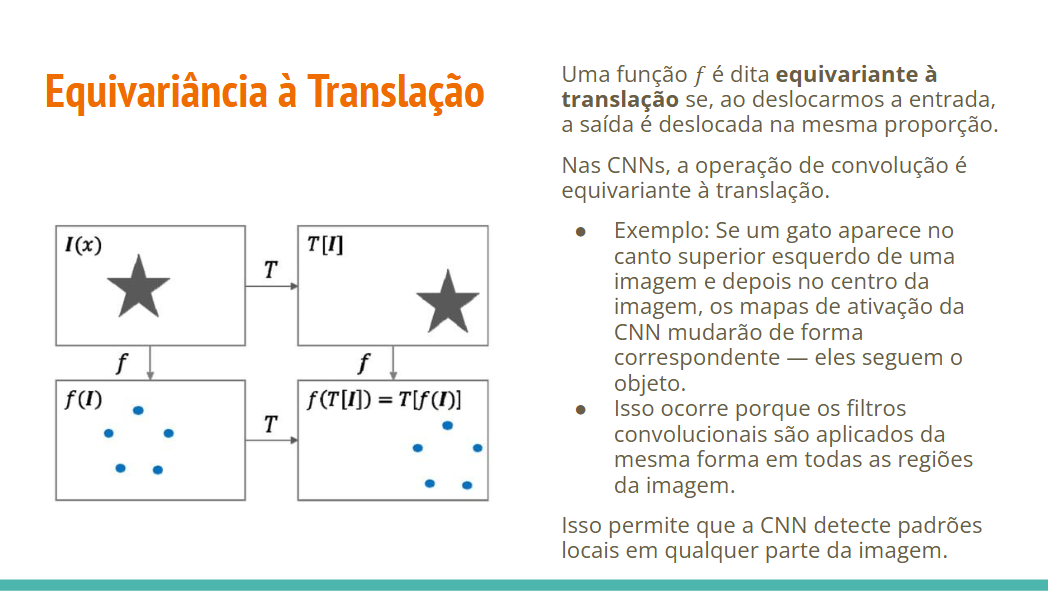

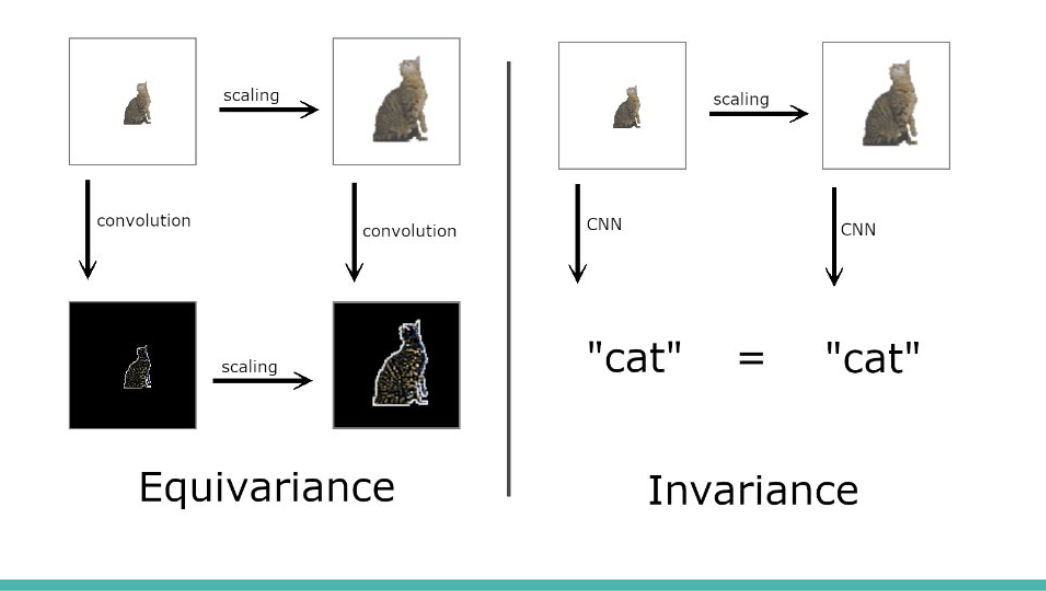

## Arquitetura

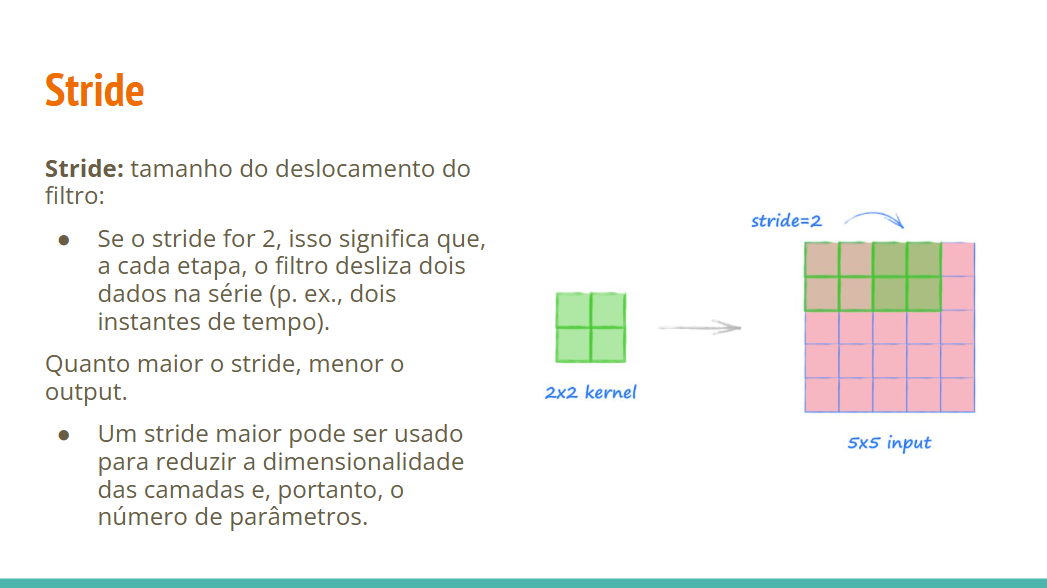

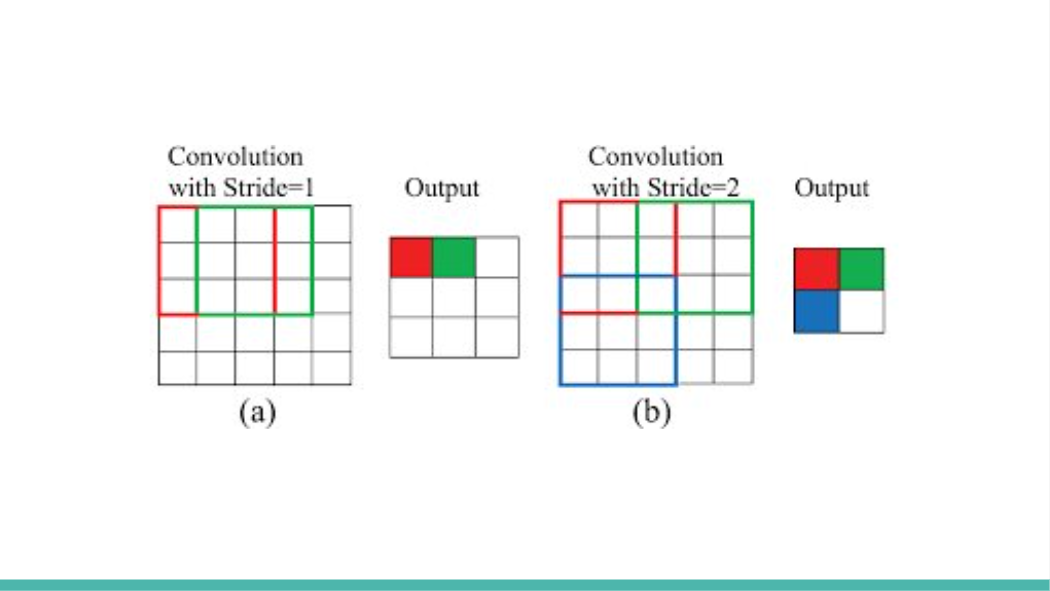

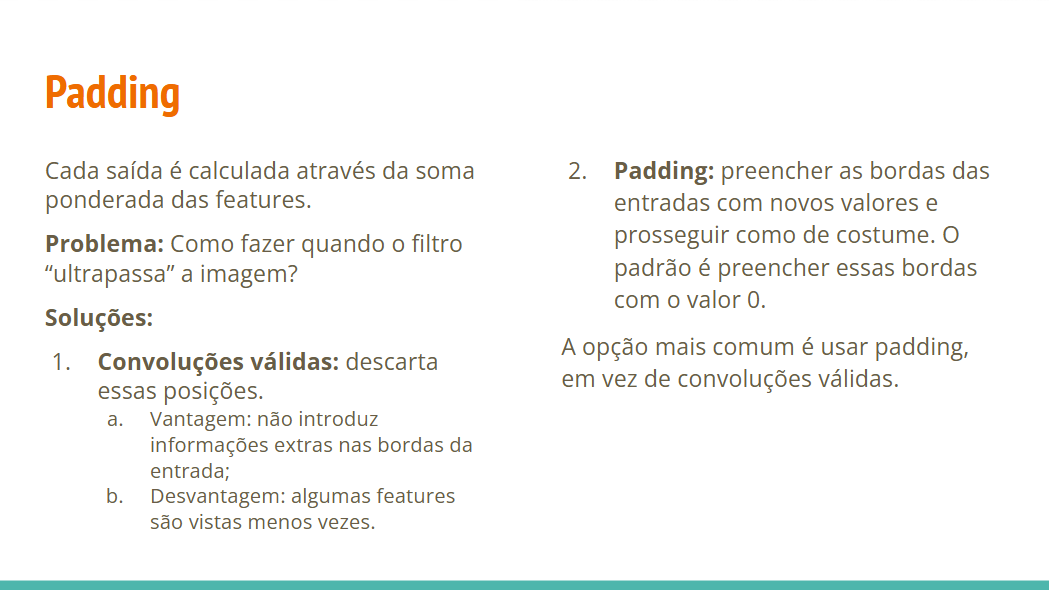

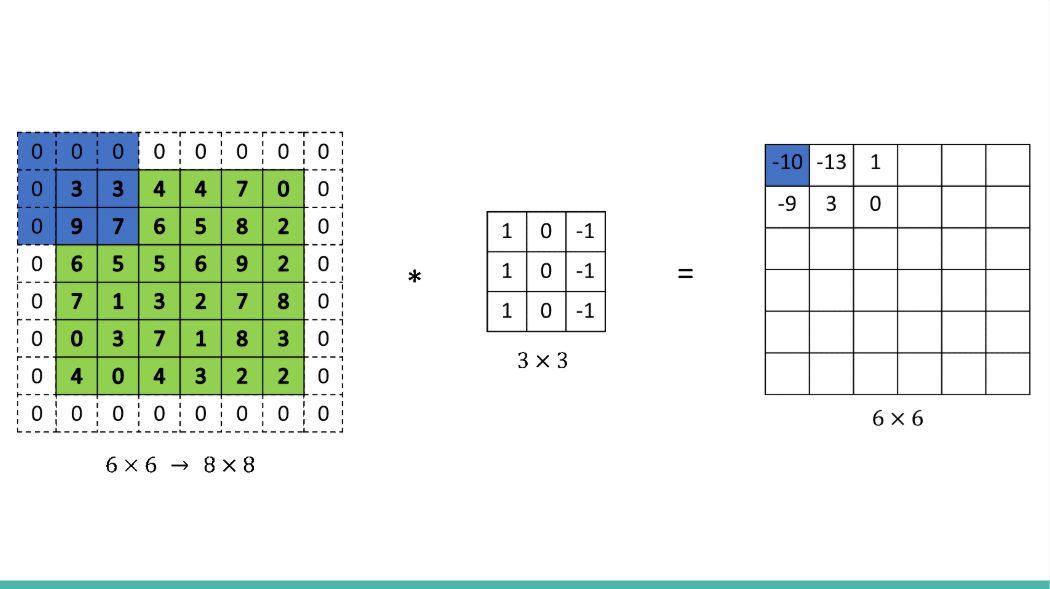

### Campo Receptivo

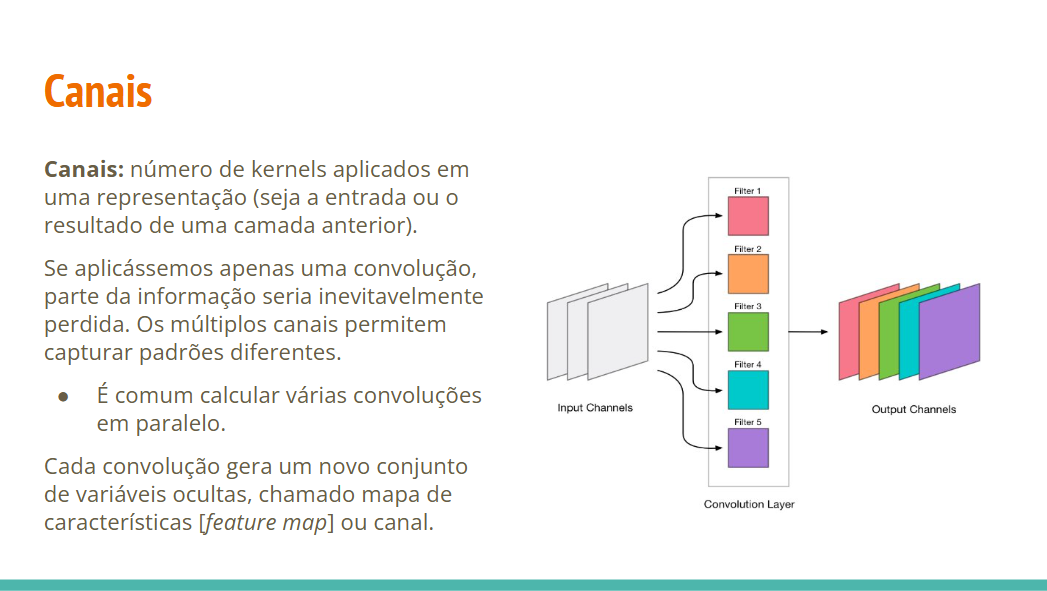

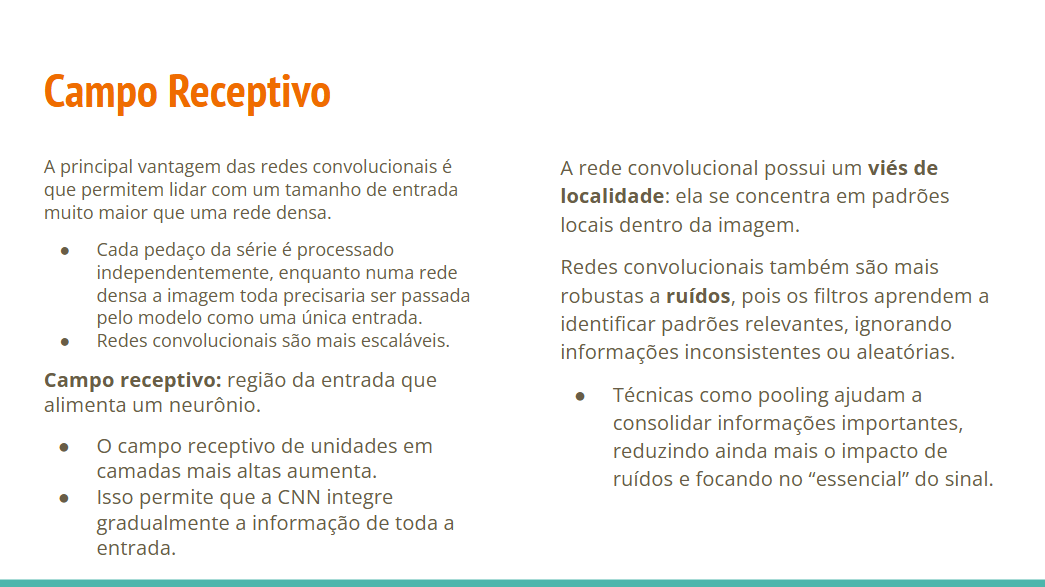

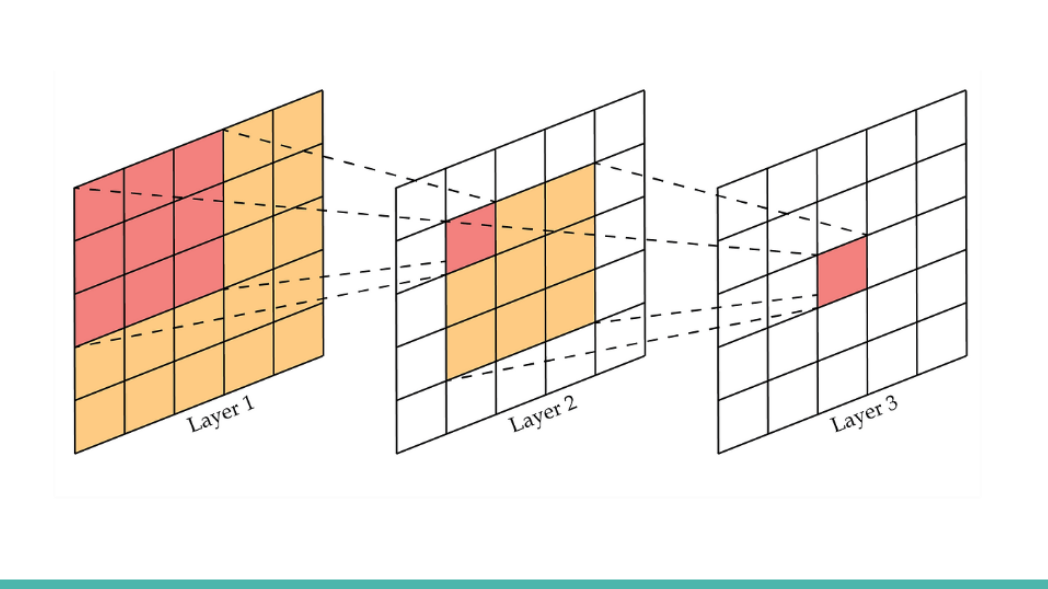

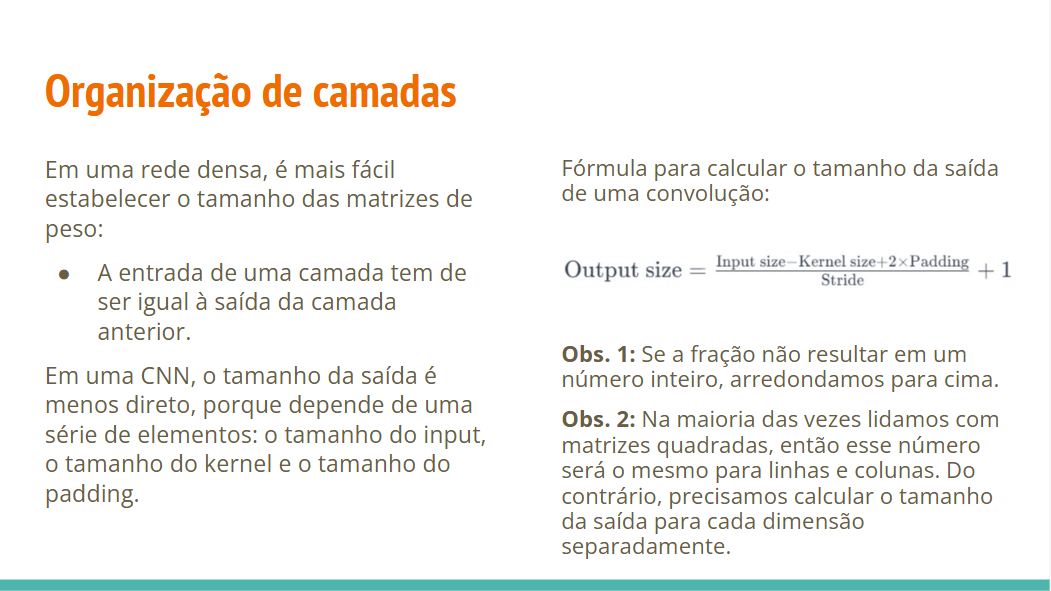

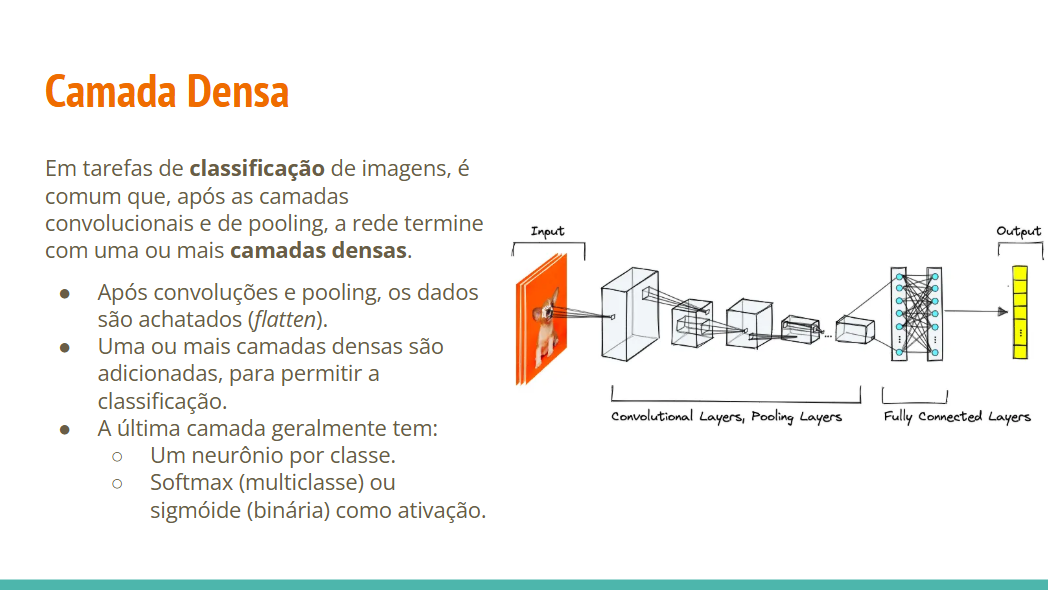

## Aplicação

O **MNIST** (Modified National Institute of Standards and Technology) é um dos datasets mais clássicos e amplamente utilizados em aprendizado de máquina e deep learning. Ele contém imagens de dígitos escritos à mão (de 0 a 9), com as seguintes características:

* 60.000 imagens para treinamento

* 10.000 imagens para teste

* Cada imagem tem dimensão 28x28 pixels em tons de cinza

* Cada amostra está associada a um rótulo que indica o dígito representado

Esse dataset é frequentemente utilizado como benchmark para testar modelos de classificação de imagens.

Vamos carregar os dados e visualizar as imagens.

In [ ]:
# Carrega os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

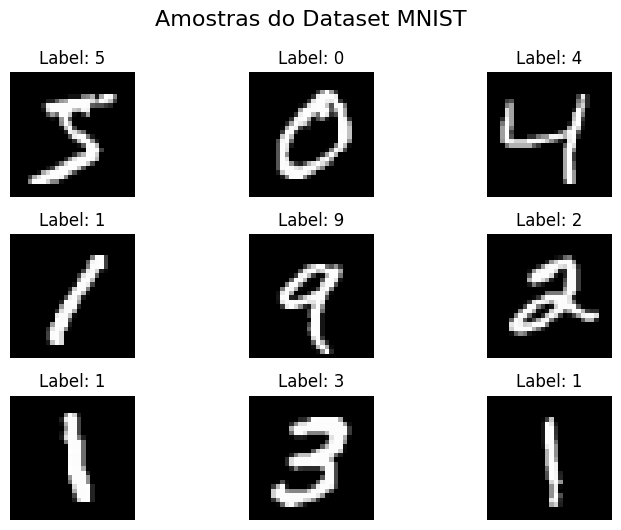

In [ ]:
# Define o número de imagens a mostrar
num_images = 9

# Cria a figura
plt.figure(figsize=(8, 5))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Amostras do Dataset MNIST', fontsize=16, y=1.05)
plt.show()

Sempre que trabalhamos com redes neurais, precisamos normalizar os dados de entrada. No caso, vamos fazer uma normalização min-max (0 a 1).

In [ ]:
# Normalizar os dados (0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

Em seguida, precisamos transformar os rótulos. A função `to_categorical` do Keras transforma rótulos inteiros (integers) em vetores one-hot codificados. Isso é necessário quando usamos a função de perda `categorical_crossentropy`, que espera que os rótulos estejam nesse formato.

In [ ]:
# Codificar as saídas como one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Vamos agora criar um modelo simples para classificação de imagens.

Como podemos lidar com imagens bidimensionais? Até agora, nosso dados de entrada eram sempre vetores unidimensionais. Uma solução simples é **achatar** as imagens em um único vetor.

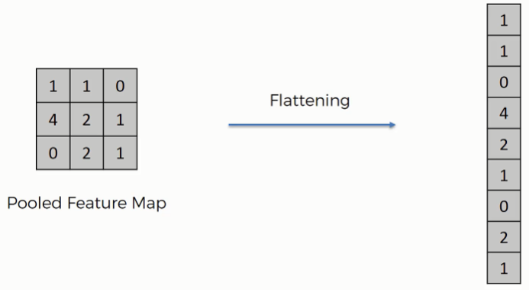

Vamos começar com uma rede extremamente simples:

* Recebe uma imagem 28x28;
* Transforma em um vetor de 784 dimensões;
* Faz uma operação linear, reduzindo para 10 dimensões;
* Aplica o softmax para gerar uma distribuição de probabilidade.

In [ ]:
# Criar o modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),  # camada que "achata" a imagem
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilar um modelo em Keras é preparar o modelo para o treinamento, especificando três componentes principais:

* **Otimizador**

 * Define como os pesos do modelo serão ajustados com base no erro.

 * Exemplo: `adam` (adaptativo, eficiente e popular).

* **Função de perda**

 * Mede o erro entre a saída prevista e o rótulo real.

 * Exemplo: `categorical_crossentropy` para classificação com rótulos one-hot.

* **Métricas**

 * Indicam o desempenho do modelo durante o treino e teste.

 * Exemplo: `accuracy` para problemas de classificação.



In [ ]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Com isso, passamos para o treinamento do modelo.

In [ ]:
# Treinar o modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 27ms/step - accuracy: 0.6982 - loss: 0.9123 - val_accuracy: 0.9608 - val_loss: 0.1501
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.9266 - loss: 0.3044 - val_accuracy: 0.9710 - val_loss: 0.1122
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9390 - loss: 0.2534 - val_accuracy: 0.9707 - val_loss: 0.1135
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9476 - loss: 0.2215 - val_accuracy: 0.9737 - val_loss: 0.0935
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9539 - loss: 0.1930 - val_accuracy: 0.9775 - val_loss: 0.0927
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9577 - loss: 0.1746 - val_accuracy: 0.9798 - val_loss: 0.0855
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9619 - loss: 0.1647 - val_accuracy: 0.9822 - val_loss: 0.0753
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9631 -

Por último, fazemos a avaliação no conjunto teste.

In [ ]:
# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9747 - loss: 0.1063
Acurácia no conjunto de teste: 0.9791


### Rede Convolucional

Vamos agora montar uma rede convolucional para o mesmo problema.

In [ ]:
# Construir a CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compilar o modelo
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Treinar o modelo
model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9677 - loss: 0.1044 - val_accuracy: 0.9898 - val_loss: 0.0354
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9760 - loss: 0.0800 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9800 - loss: 0.0678 - val_accuracy: 0.9907 - val_loss: 0.0319
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 42ms/step - accuracy: 0.9815 - loss: 0.0615 - val_accuracy: 0.9905 - val_loss: 0.0320
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9836 - loss: 0.0522 - val_accuracy: 0.9915 - val_loss: 0.0310
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 102s 52ms/step - accuracy: 0.9845 - loss: 0.0522 - val_accuracy: 0.9930 - val_loss: 0.0292
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 124s 41ms/step - accuracy: 0.9856 - loss: 0.0448 - val_accuracy: 0.9933 - val_loss: 0.0289
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9865

In [ ]:
# Avaliar no conjunto de teste
loss, acc = model_cnn.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9917 - loss: 0.0250
Acurácia no conjunto de teste: 0.9932


# Exercício: Classificação de Imagens

## Objetivo

Neste exercício, você irá treinar dois modelos para classificar imagens usando:

- Uma **rede neural densa**
- Uma **rede neural convolucional**

Você deve comparar o desempenho das duas abordagens em termos de acurácia, tempo de treino e generalização no conjunto de teste.

---

## Dataset: Binary Cats vs Dogs

Utilizaremos um subconjunto do dataset **Cats vs Dogs** disponível no [TensorFlow Datasets (`tfds`)](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs).

Esse dataset contém imagens coloridas de **gatos** e **cachorros**, com apenas **2 classes**:
- 0 → Gato
- 1 → Cachorro

---

## Tarefas

1. Carregar o dataset `cats_vs_dogs` via `tensorflow_datasets`.
2. Redimensinoar as imagens redimensionadas para um tamanho fixo, como `64x64`.
3. Dividir o conjunto de dados em treino (80%) e teste (20%).
4. Construir um **modelo denso**
5. Construir uma **rede convolucional**
6. Avaliar os modelos no conjunto de teste
7. Comparar:
   - Perda
   - Acurácia
8. Mostrar 5 imagens corretamente e 5 incorretamente classificadas por cada modelo

---

## Dicas

- Use `tfds.load('cats_vs_dogs', as_supervised=True)` para carregar o dataset.
- Use `tf.image.resize(image, [64, 64])` para redimensionar as imagens.

---

## 💡 Desafio Extra

- Implemente **EarlyStopping** para interromper o treinamento se a validação parar de melhorar.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
# Carregar o dataset
ds_train, ds_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True
)

In [ ]:
# Pré-processamento
image_size = 64
batch_size = 32

def preprocess(image, label):
    image = tf.image.resize(image, [image_size, image_size])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(batch_size)
ds_test = ds_test.map(preprocess).batch(batch_size)

In [ ]:
# Modelo Denso
mlp_model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # saída binária
])

In [ ]:
# Compilação
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Treinamento
mlp_model.fit(ds_train,
              validation_data=ds_test,
              epochs=3)

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 118s 201ms/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.5099 - val_loss: 0.6930
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 133s 186ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5099 - val_loss: 0.6931
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 73s 126ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5099 - val_loss: 0.6931


In [ ]:
# Avaliação
mlp_eval = mlp_model.evaluate(ds_test)

print(f"MLP - Acurácia: {mlp_eval[1]:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.5124 - loss: 0.6931
MLP - Acurácia: 0.5099


In [ ]:
# Modelo Convolucional
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilação
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Treinamento
cnn_model.fit(ds_train,
              validation_data=ds_test,
              epochs=3)

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 162s 273ms/step - accuracy: 0.5043 - loss: 0.6933 - val_accuracy: 0.5099 - val_loss: 0.6931
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 155s 266ms/step - accuracy: 0.5104 - loss: 0.6931 - val_accuracy: 0.5099 - val_loss: 0.6931
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 153s 263ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5099 - val_loss: 0.6931


In [ ]:
# Avaliação
cnn_eval = cnn_model.evaluate(ds_test)

print(f"CNN - Acurácia: {cnn_eval[1]:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.5124 - loss: 0.6931
CNN - Acurácia: 0.5099
